**Logistic Regression (Multiclass Classification)**

In [72]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

Whats the **digits** data contain (All calumn names):

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

**data =** Binary code of images ;
**images =** Hand written images ; 
**target =** Actual value of the image ;

*data* Looks like:

In [7]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

To show the actual *images* use *plt.gray() & plt.matshow()*:

<Figure size 432x288 with 0 Axes>

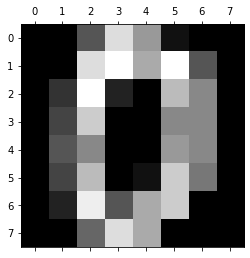

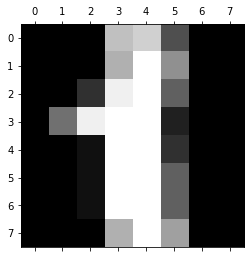

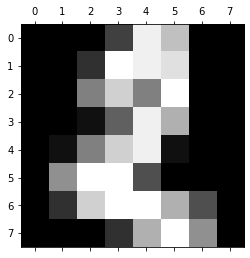

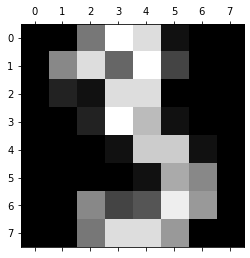

In [16]:
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])
  # plt.show()

*target* Looks like:

In [28]:
digits.target[0:4]

array([0, 1, 2, 3])

***Splite data for training and testing purpose (20%) :***

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

*Size of train & testing Data:*

In [32]:
print(f"Length of X_test Data: {len(X_test)}")
print(f"Length of X_train Data: {len(X_train)}")

Length of X_test Data: 360
Length of X_train Data: 1437


**Create Logistic Regression Model:**

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

*Train the Model:*

In [38]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Test model is working or not:**

TEST-01: For testing purposes pick up a random image[100]:

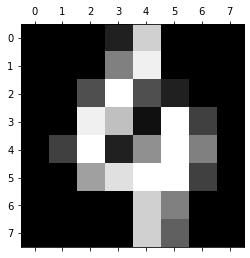

In [39]:
plt.matshow(digits.images[100])

The above image *target* value/number is:

In [58]:
actual_num=digits.target[100]
print(f"The above image is: {actual_num}")

The above image is: 4


*Now predict through the Logistic Regression Model, What number of image this is:*

In [59]:
num = model.predict([digits.data[100]])

if num == actual_num:
  print(f"Predicted number is: {num}. Model predict Successfully!!")
else:
  print(f"Predicted number is: {num}. It's Eeeor!!")

Predicted number is: [4]. Model predict Successfully!!


TEST-02: For testing purposes pick up a random image[123]:

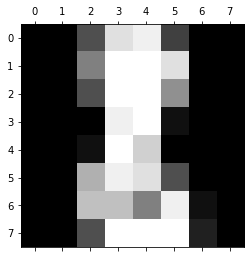

In [49]:
plt.matshow(digits.images[123])

The above image *target* value/number is:

In [56]:
actual_num = digits.target[123]
print(f"The above image is: {actual_num}")

The above image is: 8


*Now predict through the Logistic Regression Model, What number of image this is:*

In [57]:
num=model.predict([digits.data[123]])

if num == actual_num:
  print(f"Predicted number is: {num}. Model predict Successfully!!")
else:
  print(f"Predicted number is: {num}. It's Eeeor!!")

Predicted number is: [8]. Model predict Successfully!!


**Accuracy of the model:**

In [60]:
model.score(X_test, y_test)

0.95

*****************************************************************************************
**Confusion Matrix:**

In [61]:
y_predicted = model.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[37  0  1  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  2  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0]
 [ 0  1  0  0 31  0  0  0  2  1]
 [ 0  0  1  1  1 30  0  0  0  1]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  1  0  0 31  0  0]
 [ 0  0  1  0  1  0  0  0 36  0]
 [ 0  0  0  1  0  1  0  0  1 44]]


*Showing Graphically:*

Text(69.0, 0.5, 'Truth')

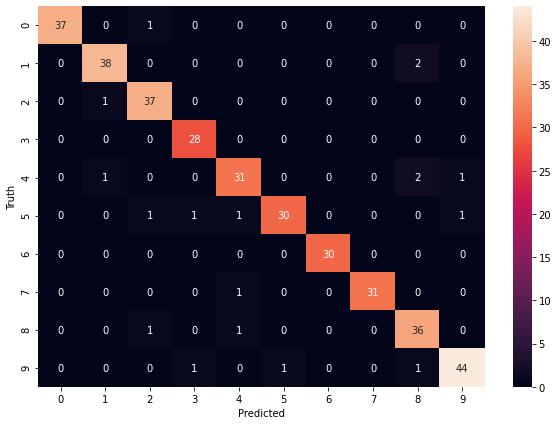

In [66]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
print("Made by AMARTA KUNDU. IT, JISCE.")

Made by AMARTA KUNDU. IT, JISCE.
